In [324]:
!pip install matplotlib
!pip install obspy

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from obspy import UTCDateTime
from matplotlib.ticker import MaxNLocator



In [326]:
filepath_picks = ""
test_pick = "C:/Users/alexa/OneDrive/Documents/GitHub/segDAS/files/CIDAS_picks.csv"

def read_pick(pick):
    df = pd.read_csv(pick)
    return df






In [327]:
read_pick(test_pick)


C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\3990981991.py:5: DtypeWarning: Columns (7,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pick)


,event_id,source_type,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset,trace_snr_db,trace_s_arrival,trace_p_arrival
0,,,,,,,,,,,,,,,,,,,
1,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,25,2023-12-30T22:35:57.200000Z,,,,,,2023-12-30T22:36:42.180000Z,2023-12-30T22:36:25.860000Z
2,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,25,2023-12-30T19:35:57.200000Z,,,,,,NaN,NaN
3,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,25,2023-12-30T08:00:57.200000Z,,,,,,2023-12-30T08:01:06.430000Z,NaN
4,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,25,2023-12-29T11:33:57.200000Z,,,,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42746,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,25,2023-12-02T01:57:56.880000Z,,,,,,2023-12-02T01:58:11.270000Z,NaN
42747,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,25,2023-12-02T01:38:56.880000Z,,,,,,NaN,NaN
42748,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,25,2023-12-01T16:32:56.880000Z,,,,,,NaN,NaN
42749,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,25,2023-12-01T10:32:56.880000Z,,,,,,NaN,NaN


In [328]:
# pull out the data from the pick file where there are not Nan values for either trace_s_arrivals or trace_p_arrivals or both
df = pd.read_csv(test_pick)

df



C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\1423811813.py:2: DtypeWarning: Columns (7,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(test_pick)


,event_id,source_type,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_onset,trace_P_onset,trace_snr_db,trace_s_arrival,trace_p_arrival
0,,,,,,,,,,,,,,,,,,,
1,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,25,2023-12-30T22:35:57.200000Z,,,,,,2023-12-30T22:36:42.180000Z,2023-12-30T22:36:25.860000Z
2,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,25,2023-12-30T19:35:57.200000Z,,,,,,NaN,NaN
3,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,25,2023-12-30T08:00:57.200000Z,,,,,,2023-12-30T08:01:06.430000Z,NaN
4,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,25,2023-12-29T11:33:57.200000Z,,,,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42746,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,25,2023-12-02T01:57:56.880000Z,,,,,,2023-12-02T01:58:11.270000Z,NaN
42747,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,25,2023-12-02T01:38:56.880000Z,,,,,,NaN,NaN
42748,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,25,2023-12-01T16:32:56.880000Z,,,,,,NaN,NaN
42749,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,25,2023-12-01T10:32:56.880000Z,,,,,,NaN,NaN


In [329]:
#remove the Z from the trace_start_time column 

In [330]:
# datetime interaction
from datetime import datetime
from datetime import timedelta as dt
from obspy.core.utcdatetime import UTCDateTime  

# Function to safely convert timestamps
def safe_to_datetime(timestamp):
    try:
        return UTCDateTime(timestamp).datetime
    except Exception:
        return pd.NaT

# Apply the safe conversion function
df['trace_start_time_unix'] = df['trace_start_time'].apply(safe_to_datetime)

# Convert to Unix timestamp (seconds since epoch)
df['trace_start_time_unix'] = df['trace_start_time_unix'].apply(lambda x: x.timestamp() if x is not pd.NaT else pd.NaT)



In [331]:
# datetime interaction
from datetime import datetime
from datetime import timedelta as dt
from obspy.core.utcdatetime import UTCDateTime  

import pandas as pd
from datetime import datetime
from obspy.core.utcdatetime import UTCDateTime

# Function to safely convert timestamps
def safe_to_datetime(timestamp):
    try:
        return UTCDateTime(timestamp).datetime
    except Exception:
        return pd.NaT

# Apply the safe conversion function
df['trace_p_arrival_unix'] = df['trace_p_arrival'].apply(safe_to_datetime)

# Convert to Unix timestamp (seconds since epoch)
df['trace_p_arrival_unix'] = df['trace_p_arrival_unix'].apply(lambda x: x.timestamp() if x is not pd.NaT else pd.NaT)



In [332]:
# datetime interaction
from datetime import datetime
from datetime import timedelta as dt
from obspy.core.utcdatetime import UTCDateTime  

import pandas as pd
from datetime import datetime
from obspy.core.utcdatetime import UTCDateTime

# Function to safely convert timestamps
def safe_to_datetime(timestamp):
    try:
        return UTCDateTime(timestamp).datetime
    except Exception:
        return pd.NaT

# Apply the safe conversion function
df['trace_s_arrival_unix'] = df['trace_s_arrival'].apply(safe_to_datetime)

# Convert to Unix timestamp (seconds since epoch)
df['trace_s_arrival_unix'] = df['trace_s_arrival_unix'].apply(lambda x: x.timestamp() if x is not pd.NaT else pd.NaT)



In [333]:
df['trace_p_arrival_sec'] = df['trace_p_arrival_unix'] - df['trace_start_time_unix']
df['trace_s_arrival_sec'] = df['trace_s_arrival_unix'] - df['trace_start_time_unix'] 

In [334]:
df

,event_id,source_type,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,...,trace_S_onset,trace_P_onset,trace_snr_db,trace_s_arrival,trace_p_arrival,trace_start_time_unix,trace_p_arrival_unix,trace_s_arrival_unix,trace_p_arrival_sec,trace_s_arrival_sec
0,,,,,,,,,,,...,,,,,,NaT,NaT,NaT,NaN,NaN
1,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,...,,,,2023-12-30T22:36:42.180000Z,2023-12-30T22:36:25.860000Z,1703975757.2,1703975785.86,1703975802.18,28.66,44.98
2,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,...,,,,NaN,NaN,1703964957.2,NaT,NaT,NaN,NaN
3,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,...,,,,2023-12-30T08:01:06.430000Z,NaN,1703923257.2,NaT,1703923266.43,NaN,9.23
4,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,...,,,,NaN,NaN,1703849637.2,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42746,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,...,,,,2023-12-02T01:58:11.270000Z,NaN,1701482276.88,NaT,1701482291.27,NaN,14.39
42747,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,...,,,,NaN,NaN,1701481136.88,NaT,NaT,NaN,NaN
42748,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,...,,,,NaN,NaN,1701448376.88,NaT,NaT,NaN,NaN
42749,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,...,,,,NaN,NaN,1701426776.88,NaT,NaT,NaN,NaN


In [335]:
grouped_df = df.groupby('trace_start_time').apply(lambda x: x)
grouped_df

#add an additional column which is the number that is that is in the followed by das in the station_code column 
grouped_df['das_number'] = grouped_df['station_code'].str.extract('(\d+)')
grouped_df

C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\3592547359.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = df.groupby('trace_start_time').apply(lambda x: x)


event_id source_type station_network_code  \
trace_start_time                                                              
                            0                                                 
2023-12-01T05:50:56.880000Z 21470                                     CIDAS   
                            21565                                     CIDAS   
                            21660                                     CIDAS   
                            21755                                     CIDAS   
...                                    ...         ...                  ...   
2023-12-30T22:35:57.200000Z 20901                                     CIDAS   
                            20996                                     CIDAS   
                            21091                                     CIDAS   
                            21186                                     CIDAS   
                            21281                                     CIDAS   

                                  station_channel_code station_code  \
trace_start_time                                                      
                            0                                         
2023-12-01T05:50:56.880000Z 21470                           das2250   
                            21565                           das2260   
                            21660                           das2270   
                            21755                           das2280   
...                                                ...          ...   
2023-12-30T22:35:57.200000Z 20901                           das2200   
                            20996                           das2210   
                            21091                           das2220   
                            21186                           das2230   
                            21281                           das2240   

                                  station_location_code station_latitude_deg  \
trace_start_time                                                               
                            0                                                  
2023-12-01T05:50:56.880000Z 21470                              59.6231316964   
                            21565                              59.6225635216   
                            21660                              59.6219952682   
                            21755                               59.621426936   
...                                                 ...                  ...   
2023-12-30T22:35:57.200000Z 20901                              59.6051334253   
                            20996                              59.6065711433   
                            21091                              59.6082059641   
                            21186                              59.6086841406   
                            21281                              59.6101172901   

                                  station_longitude_deg station_elevation_m  \
trace_start_time                                                              
                            0                                                 
2023-12-01T05:50:56.880000Z 21470         -151.61228522      -17.3175342765   
                            21565        -151.615487668      -18.7937778432   
                            21660        -151.618690008      -20.2679850174   
                            21755        -151.621892241       -21.586400689   
...                                                 ...                 ...   
2023-12-30T22:35:57.200000Z 20901        -151.582361186      -25.6091513457   
                            20996        -151.580517482      -23.9690764135   
                            21091        -151.580760677      -22.6053314043   
                            21186        -151.578191349      -21.4473477359   
                            21281        -151.576318745      -19.8287074186   

             

In [336]:
#plot the das number vs the trace_p_arrival_sec and trace_s_arrival_sec for one trace_start_time

unique_trace_start_times = grouped_df.index.get_level_values('trace_start_time').unique()
print(unique_trace_start_times)

folder_name = 'F:\DAS'


# for i in unique_trace_start_times:
#     grouped_df[grouped_df.index.get_level_values('trace_start_time') == i].plot(x='das_number', y='trace_p_arrival_sec', kind='scatter')
#     plt.title('trace_p_arrival_sec vs das_number for trace_start_time')
#     png_name = 'trace_p_arrival_sec_vs_das_number_for_trace_start_time_' + str(i) + '.png'
#     plt.savefig(png_name)

Index([' ', '2023-12-01T05:50:56.880000Z', '2023-12-01T05:50:57.200000Z',
       '2023-12-01T10:32:56.880000Z', '2023-12-01T10:32:57.200000Z',
       '2023-12-01T16:32:56.880000Z', '2023-12-01T16:32:57.200000Z',
       '2023-12-02T01:38:56.880000Z', '2023-12-02T01:38:57.200000Z',
       '2023-12-02T01:57:56.880000Z',
       ...
       '2023-12-29T02:13:56.880000Z', '2023-12-29T02:13:57.200000Z',
       '2023-12-29T11:33:56.880000Z', '2023-12-29T11:33:57.200000Z',
       '2023-12-30T08:00:56.880000Z', '2023-12-30T08:00:57.200000Z',
       '2023-12-30T19:35:56.880000Z', '2023-12-30T19:35:57.200000Z',
       '2023-12-30T22:35:56.880000Z', '2023-12-30T22:35:57.200000Z'],
      dtype='object', name='trace_start_time', length=187)


In [337]:
import os

### Not great for loop:

In [338]:
# number = 0
# for i in unique_trace_start_times:
#     number += 1
#     plt.figure(figsize=(10, 6))
#     for col in ['trace_s_arrival_sec']:
#         if grouped_df.loc[i, col].isna().any():
#             print(f"NaN values found in {col} for trace_start_time {i}")
#         else:
#             grouped_df[grouped_df.index.get_level_values('trace_start_time') == i].plot(x='das_number', y='trace_s_arrival_sec', kind='scatter', color = "blue")

#     for col in  ['trace_p_arrival_sec']:      
#         if grouped_df.loc[i, col].isna().any():
#             print(f"NaN values found in {col} for trace_start_time {i}")
#         else:
#             grouped_df[grouped_df.index.get_level_values('trace_start_time') == i].plot(x='das_number', y='trace_p_arrival_sec', kind='scatter', color = "red")
    
#     # Define directory and filename
#     directory = "F:/DAS/pick_plots"
#     filename = str(number) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     # Save the plot
#     plt.savefig(filepath)
#     plt.close()





### Possibly better for loop:

Dropping columns that have Nan values for both trace_s_arrival and trace_p_arrival

In [339]:
# Drop rows where both 'trace_s_arrival_sec' and 'trace_p_arrival_sec' are NaN
df_dropped = df.dropna(subset=['trace_s_arrival_sec', 'trace_p_arrival_sec'], how='all')

# Display the updated dataframe
df_dropped

,event_id,source_type,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,...,trace_S_onset,trace_P_onset,trace_snr_db,trace_s_arrival,trace_p_arrival,trace_start_time_unix,trace_p_arrival_unix,trace_s_arrival_unix,trace_p_arrival_sec,trace_s_arrival_sec
1,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,...,,,,2023-12-30T22:36:42.180000Z,2023-12-30T22:36:25.860000Z,1703975757.2,1703975785.86,1703975802.18,28.66,44.98
3,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,...,,,,2023-12-30T08:01:06.430000Z,NaN,1703923257.2,NaT,1703923266.43,NaN,9.23
5,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,...,,,,2023-12-29T02:14:32.170001Z,2023-12-29T02:14:15.740001Z,1703816037.2,1703816055.740001,1703816072.170001,18.540001,34.970001
6,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,...,,,,2023-12-28T14:18:34.770000Z,NaN,1703773077.2,NaT,1703773114.77,NaN,37.57
9,,,CIDAS,,das0,,59.3535133831,-152.119676244,-62.9264913353,,...,,,,2023-12-27T05:06:51.030002Z,2023-12-27T05:06:44.650001Z,1703653557.2,1703653604.650001,1703653611.030002,47.450001,53.830002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42728,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,...,,,,NaN,2023-12-07T02:57:51.220000Z,1701917816.88,1701917871.22,NaT,54.34,NaN
42737,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,...,,,,2023-12-05T05:24:22.730000Z,NaN,1701753836.88,NaT,1701753862.73,NaN,25.85
42741,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,...,,,,2023-12-03T07:30:33.179999Z,NaN,1701588596.88,NaT,1701588633.179999,NaN,36.299999
42746,,,CIDAS,,das4490,,59.58414,-152.343681,-55.999752,,...,,,,2023-12-02T01:58:11.270000Z,NaN,1701482276.88,NaT,1701482291.27,NaN,14.39


regrouping

In [340]:
grouped_df_dropped = df_dropped.groupby('trace_start_time').apply(lambda x: x)
grouped_df_dropped

#add an additional column which is the number that is that is in the followed by das in the station_code column 
grouped_df_dropped['das_number'] = grouped_df_dropped['station_code'].str.extract('(\d+)')
grouped_df_dropped

C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\2907651947.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df_dropped = df_dropped.groupby('trace_start_time').apply(lambda x: x)


event_id source_type station_network_code  \
trace_start_time                                                              
2023-12-01T05:50:56.880000Z 21470                                     CIDAS   
                            21565                                     CIDAS   
                            21660                                     CIDAS   
                            21755                                     CIDAS   
                            21850                                     CIDAS   
...                                    ...         ...                  ...   
2023-12-30T22:35:57.200000Z 20806                                     CIDAS   
                            20901                                     CIDAS   
                            20996                                     CIDAS   
                            21186                                     CIDAS   
                            21281                                     CIDAS   

                                  station_channel_code station_code  \
trace_start_time                                                      
2023-12-01T05:50:56.880000Z 21470                           das2250   
                            21565                           das2260   
                            21660                           das2270   
                            21755                           das2280   
                            21850                           das2290   
...                                                ...          ...   
2023-12-30T22:35:57.200000Z 20806                           das2190   
                            20901                           das2200   
                            20996                           das2210   
                            21186                           das2230   
                            21281                           das2240   

                                  station_location_code station_latitude_deg  \
trace_start_time                                                               
2023-12-01T05:50:56.880000Z 21470                              59.6231316964   
                            21565                              59.6225635216   
                            21660                              59.6219952682   
                            21755                               59.621426936   
                            21850                              59.6208585253   
...                                                 ...                  ...   
2023-12-30T22:35:57.200000Z 20806                              59.6037060557   
                            20901                              59.6051334253   
                            20996                              59.6065711433   
                            21186                              59.6086841406   
                            21281                              59.6101172901   

                                  station_longitude_deg station_elevation_m  \
trace_start_time                                                              
2023-12-01T05:50:56.880000Z 21470         -151.61228522      -17.3175342765   
                            21565        -151.615487668      -18.7937778432   
                            21660        -151.618690008      -20.2679850174   
                            21755        -151.621892241       -21.586400689   
                            21850        -151.625094367      -23.2750093549   
...                                                 ...                 ...   
2023-12-30T22:35:57.200000Z 20806        -151.584250629      -26.9169346047   
                            20901        -151.582361186      -25.6091513457   
                            20996        -151.580517482      -23.9690764135   
                            21186        -151.578191349      -21.4473477359   
                            21281        -151.576318745      -19.8287074186   

             

In [341]:
#find the number of times that each 

In [342]:
unique_trace_start_times_dropped = grouped_df_dropped.index.get_level_values('trace_start_time').unique()
print(unique_trace_start_times_dropped)

Index(['2023-12-01T05:50:56.880000Z', '2023-12-01T05:50:57.200000Z',
       '2023-12-02T01:38:56.880000Z', '2023-12-02T01:38:57.200000Z',
       '2023-12-02T01:57:56.880000Z', '2023-12-02T01:57:57.200000Z',
       '2023-12-02T10:27:56.880000Z', '2023-12-02T10:27:57.200000Z',
       '2023-12-02T14:56:56.880000Z', '2023-12-02T14:56:57.200000Z',
       ...
       '2023-12-28T14:17:56.880000Z', '2023-12-28T14:17:57.200000Z',
       '2023-12-29T02:13:56.880000Z', '2023-12-29T02:13:57.200000Z',
       '2023-12-30T08:00:56.880000Z', '2023-12-30T08:00:57.200000Z',
       '2023-12-30T19:35:56.880000Z', '2023-12-30T19:35:57.200000Z',
       '2023-12-30T22:35:56.880000Z', '2023-12-30T22:35:57.200000Z'],
      dtype='object', name='trace_start_time', length=147)


In [343]:
min_trace_p_arrival_sec = grouped_df_dropped['trace_p_arrival_sec'].min()
max_trace_p_arrival_sec = grouped_df_dropped['trace_p_arrival_sec'].max()
min_trace_s_arrival_sec = grouped_df_dropped['trace_s_arrival_sec'].min()
max_trace_s_arrival_sec = grouped_df_dropped['trace_s_arrival_sec'].max()

print("Min trace_p_arrival_sec:", min_trace_p_arrival_sec)
print("Max trace_p_arrival_sec:", max_trace_p_arrival_sec)
print("Min trace_s_arrival_sec:", min_trace_s_arrival_sec)
print("Max trace_s_arrival_sec:", max_trace_s_arrival_sec)


Min trace_p_arrival_sec: 5.009999990463257
Max trace_p_arrival_sec: 54.990001916885376
Min trace_s_arrival_sec: 7.6499998569488525
Max trace_s_arrival_sec: 54.980000019073486


In [344]:
unique_trace_start_times_dropped

Index(['2023-12-01T05:50:56.880000Z', '2023-12-01T05:50:57.200000Z',
       '2023-12-02T01:38:56.880000Z', '2023-12-02T01:38:57.200000Z',
       '2023-12-02T01:57:56.880000Z', '2023-12-02T01:57:57.200000Z',
       '2023-12-02T10:27:56.880000Z', '2023-12-02T10:27:57.200000Z',
       '2023-12-02T14:56:56.880000Z', '2023-12-02T14:56:57.200000Z',
       ...
       '2023-12-28T14:17:56.880000Z', '2023-12-28T14:17:57.200000Z',
       '2023-12-29T02:13:56.880000Z', '2023-12-29T02:13:57.200000Z',
       '2023-12-30T08:00:56.880000Z', '2023-12-30T08:00:57.200000Z',
       '2023-12-30T19:35:56.880000Z', '2023-12-30T19:35:57.200000Z',
       '2023-12-30T22:35:56.880000Z', '2023-12-30T22:35:57.200000Z'],
      dtype='object', name='trace_start_time', length=147)

In [345]:
# import numpy as np

# for i in unique_trace_start_times_dropped:
#     if i.strip() == '':
#         print(f"Skipping invalid trace_start_time: '{i}'")
#         continue
    
#     # Define directory and filename
#     # Convert i into a string with format YYYYMMDD_HHMMSS
#     name = str(i).replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
    
#     directory = "F:/DAS/pick_plots_new"
#     filename = str(name) + ".png"

#     # Combine directory and filename
#     filepath = os.path.join(directory, filename)

#     plt.figure(figsize=(10, 6))
  

#     subset = grouped_df_dropped.loc[i]

#     plt.plot(subset['das_number'], subset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
#     plt.plot(subset['das_number'], subset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

#     plt.title(f'Trace Arrivals vs Channel for {i}')
#     plt.xlabel('Channel')
#     plt.ylabel('Arrival Time (sec)')
#     plt.ylim(0, 60)
#     plt.legend()

#     # Set the number of ticks to 5
#     plt.gca().xaxis.set_major_locator(MaxNLocator(5))
#     #change the number of ticks on the x axis to be 5 total
#     # Save the plot
#     plt.savefig(filepath)
#     plt.close()
    

## Test with normalizing and interpolating

In [346]:
# Select the specific row based on the index
data_2023_12_30 = grouped_df_dropped.loc['2023-12-30T22:35:57.200000Z']

# Select specific columns from the row
dropped_dataset = data_2023_12_30[['trace_p_arrival_sec', 'trace_s_arrival_sec', 'das_number']]
p_dataset = dropped_dataset[['trace_p_arrival_sec','das_number']]
s_dataset = dropped_dataset[['trace_s_arrival_sec','das_number']]


In [347]:
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\751016926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\751016926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset.dropna(subset=['trace_s_arrival_sec', "das_number"], inplace = True)


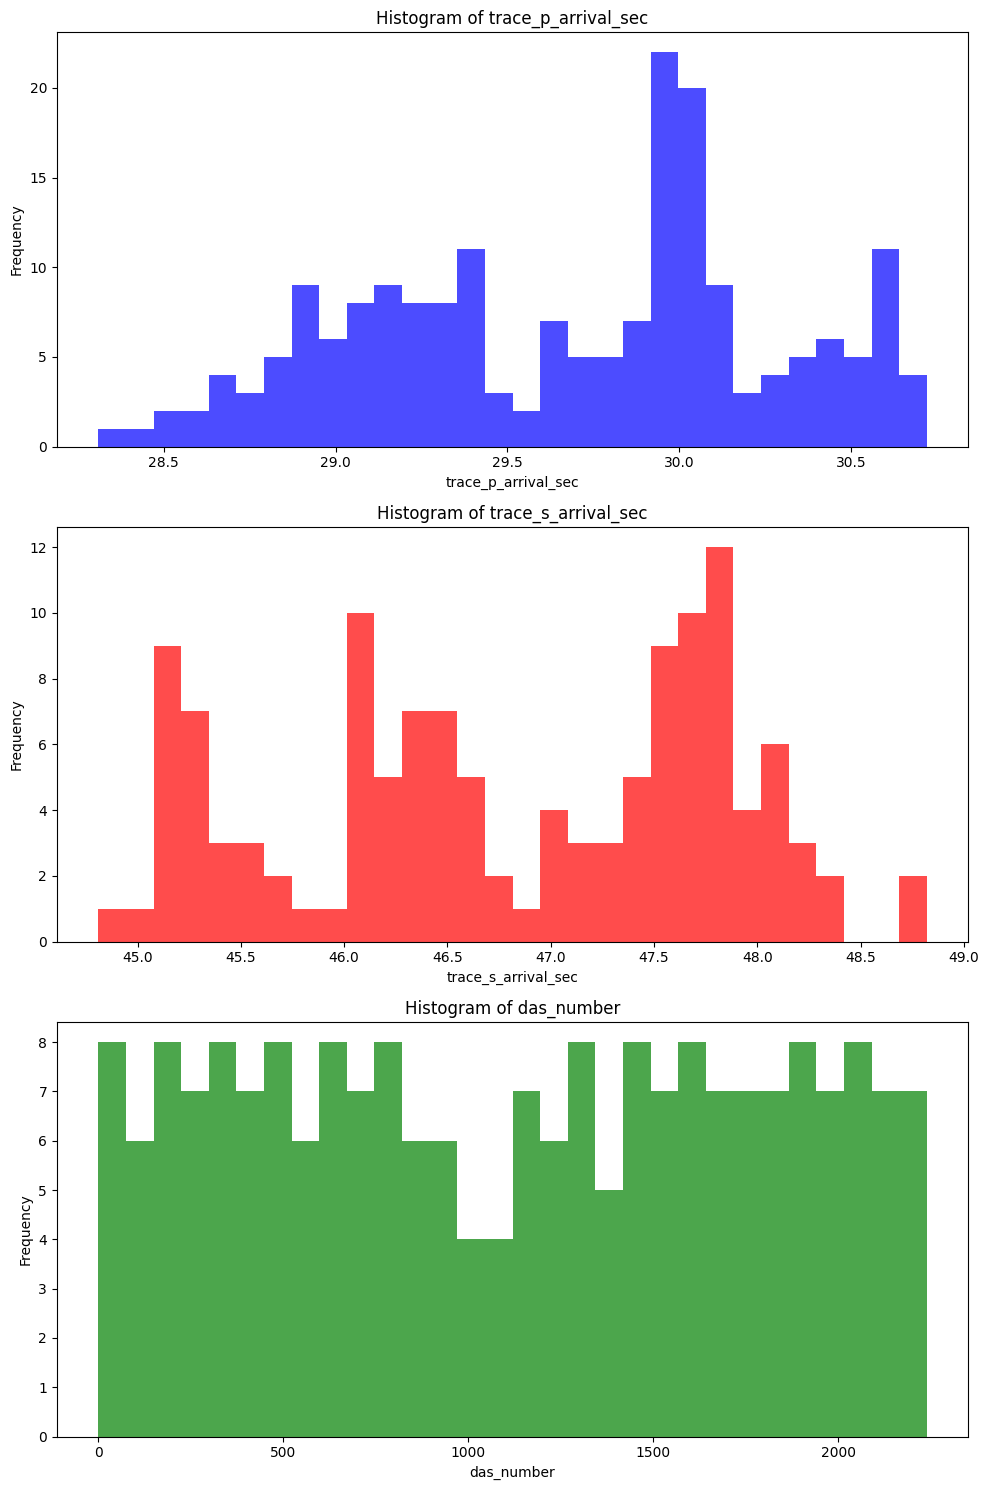

In [348]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(dropped_dataset['trace_p_arrival_sec'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(dropped_dataset['trace_s_arrival_sec'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

# Histogram for das_number
axes[2].hist(pd.to_numeric(dropped_dataset['das_number'], errors='coerce').dropna(), bins=30, color='green', alpha=0.7)
axes[2].set_title('Histogram of das_number')
axes[2].set_xlabel('das_number')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

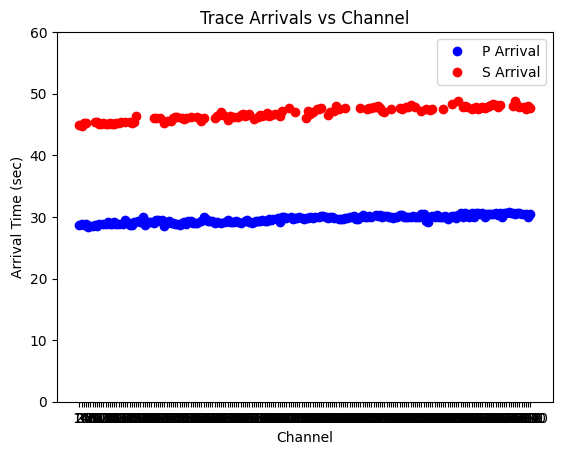

In [349]:
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [350]:
p_dataset
#convert das_number column to int
p_dataset['das_number'] = p_dataset['das_number'].astype(float)
s_dataset['das_number'] = s_dataset['das_number'].astype(float)
p_dataset['trace_p_arrival_sec'] = p_dataset['trace_p_arrival_sec'].astype(float)
s_dataset['trace_s_arrival_sec'] = s_dataset['trace_s_arrival_sec'].astype(float)



C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\2963224887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['das_number'] = p_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\2963224887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['das_number'] = s_dataset['das_number'].astype(float)
C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\2963224887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [351]:

#is there nans in p_dataset["trace_[arrival_sec"]"]
p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)
print(p_dataset["trace_p_arrival_sec"].isna())


1        False
96       False
191      False
286      False
381      False
         ...  
20711    False
20806    False
20996    False
21186    False
21281    False
Name: trace_p_arrival_sec, Length: 195, dtype: bool


C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\620326073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset.dropna(subset=['trace_p_arrival_sec', "das_number"], inplace = True)


In [352]:
print(p_dataset["das_number"].dtype)
print(p_dataset["trace_p_arrival_sec"].dtype)
print(s_dataset["das_number"].dtype)
print(s_dataset["trace_s_arrival_sec"].dtype)


float64
float64
float64
float64


In [353]:
print(p_dataset["das_number"].values)
print(p_dataset["trace_p_arrival_sec"].values)
print(s_dataset["das_number"].values)
print(s_dataset["trace_s_arrival_sec"].values)


[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  120.  130.
  140.  150.  160.  170.  180.  190.  210.  220.  230.  240.  250.  260.
  280.  290.  300.  310.  320.  330.  340.  350.  360.  370.  380.  390.
  400.  410.  420.  430.  440.  450.  460.  470.  480.  490.  500.  510.
  520.  530.  540.  550.  580.  590.  600.  610.  620.  630.  640.  650.
  670.  690.  700.  710.  720.  730.  740.  750.  760.  780.  790.  800.
  810.  820.  840.  850.  860.  870.  880.  890.  900.  910.  920.  940.
  950. 1000. 1010. 1020. 1050. 1070. 1090. 1100. 1130. 1140. 1150. 1160.
 1170. 1180. 1190. 1200. 1230. 1240. 1250. 1260. 1270. 1280. 1290. 1300.
 1320. 1330. 1340. 1360. 1370. 1380. 1400. 1410. 1420. 1430. 1440. 1450.
 1460. 1470. 1480. 1490. 1510. 1520. 1530. 1540. 1550. 1560. 1570. 1580.
 1590. 1600. 1610. 1620. 1630. 1640. 1650. 1660. 1670. 1680. 1690. 1700.
 1710. 1720. 1730. 1740. 1750. 1760. 1780. 1790. 1800. 1810. 1820. 1830.
 1840. 1850. 1860. 1870. 1880. 1890. 1900. 1910. 19

In [354]:
import numpy as np
import matplotlib.pyplot as plt

# Fit individual polynomials for p_dataset and s_dataset
p_coeffs_individual = np.polyfit(p_dataset['das_number'].values, p_dataset['trace_p_arrival_sec'].values, deg=1)
s_coeffs_individual = np.polyfit(s_dataset['das_number'].values, s_dataset['trace_s_arrival_sec'].values, deg=1)

# # Calculate the trends
p_trend_individual = np.polyval(p_coeffs_individual, pd.to_numeric(p_dataset['das_number']))
s_trend_individual = np.polyval(s_coeffs_individual, pd.to_numeric(s_dataset['das_number']))

# # Detrend by subtracting the individual trends
p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual



C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\25613787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_detrended'] = p_dataset['trace_p_arrival_sec'] - p_trend_individual
C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\25613787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_detrended'] = s_dataset['trace_s_arrival_sec'] - s_trend_individual


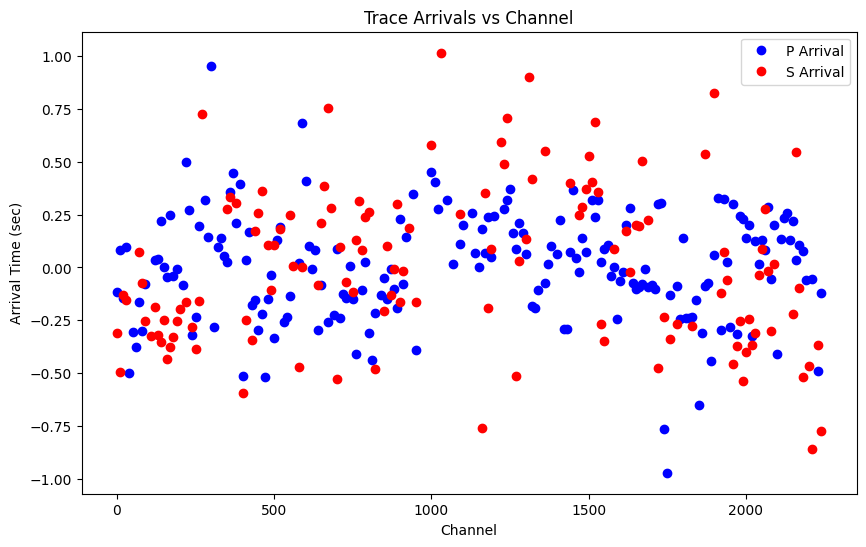

In [355]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_detrended'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_detrended'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.legend()
# Set the number of ticks to 5
plt.gca().xaxis.set_major_locator(MaxNLocator(5))

Text(0, 0.5, 'Frequency')

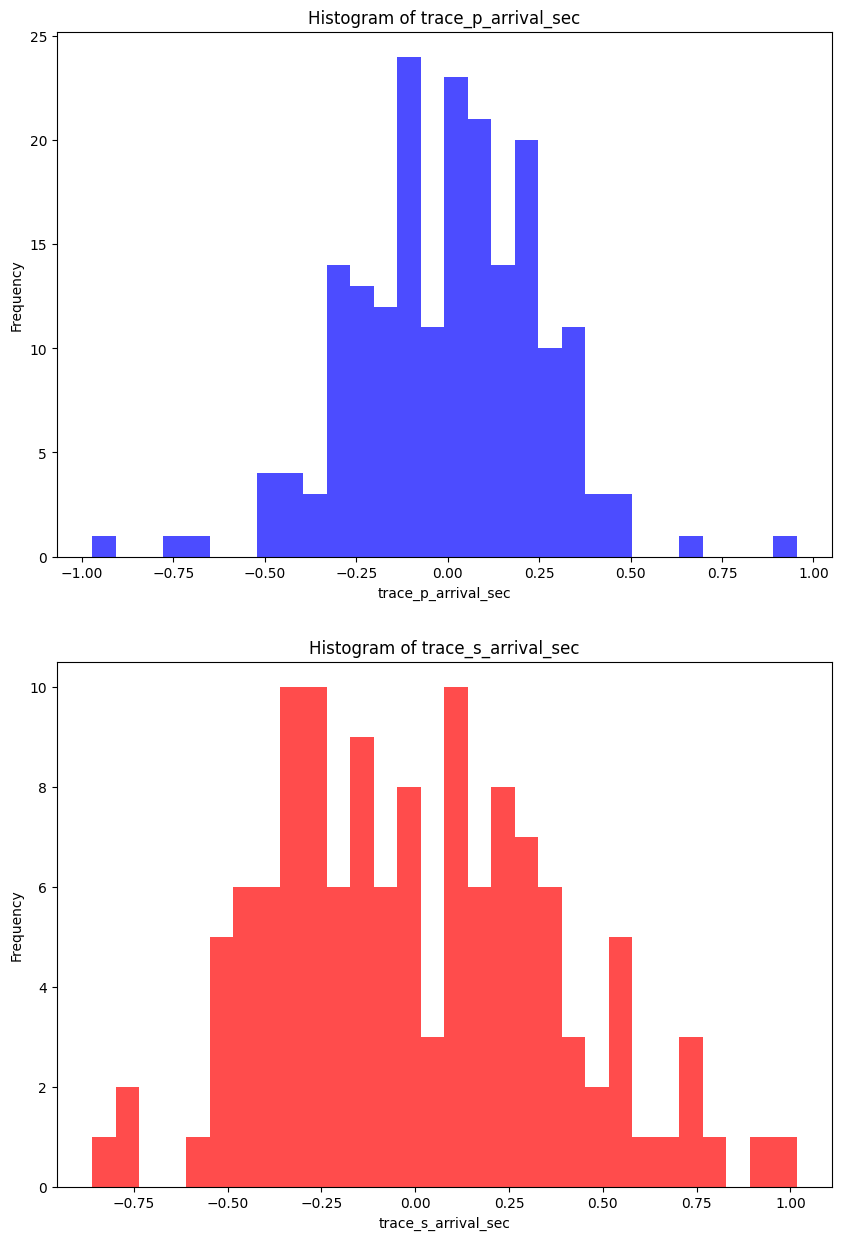

In [356]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')


In [357]:
#calculate 2 standard deviations from the mean for the trace_p_arrival_sec and trace_s_arrival_sec columns
p_dataset_mean = p_dataset['trace_p_arrival_sec_detrended'].mean()
p_dataset_std = p_dataset['trace_p_arrival_sec_detrended'].std()
p_dataset_2std = 2 * p_dataset_std

print(p_dataset_mean)
print(p_dataset_std)
print(p_dataset_2std)



2.022313940240285e-15
0.25571951595899595
0.5114390319179919


In [358]:
# do it for s_dataset
s_dataset_mean = s_dataset['trace_s_arrival_sec_detrended'].mean()
s_dataset_std = s_dataset['trace_s_arrival_sec_detrended'].std()
s_dataset_2std = 2 * s_dataset_std

print(s_dataset_mean)
print(s_dataset_std)
print(s_dataset_2std)

1.0380585280245214e-14
0.3729898592187784
0.7459797184375568


In [359]:
#save values for index which are greater than 2 standard deviations from the mean for the trace_p_arrival_sec column
p_dataset_outliers = p_dataset[(p_dataset['trace_p_arrival_sec_detrended'].values > p_dataset_2std) | 
                               (p_dataset['trace_p_arrival_sec_detrended'].values < -p_dataset_2std)]

p_dataset_outliers

#replace p_dataset trace_p_arrival_sec and trace_p_arrival_sec_detrended with Nans for the das_number values that occur in p_dataset_outliers
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec'] = np.nan
p_dataset.loc[p_dataset_outliers.index, 'trace_p_arrival_sec_detrended'] = np.nan


#find the columns that are Nans
p_dataset[p_dataset['trace_p_arrival_sec'].isna()]

,trace_p_arrival_sec,das_number,trace_p_arrival_sec_detrended
2851,NaN,300.0,NaN
3801,NaN,400.0,NaN
4466,NaN,470.0,NaN
5606,NaN,590.0,NaN
16531,NaN,1740.0,NaN
16626,NaN,1750.0,NaN
17576,NaN,1850.0,NaN


In [360]:
# Save values for index which are greater than 2 standard deviations from the mean for the trace_s_arrival_sec column
s_dataset_outliers = s_dataset[(s_dataset['trace_s_arrival_sec_detrended'].values > s_dataset_2std) | 
                               (s_dataset['trace_s_arrival_sec_detrended'].values < -s_dataset_2std)]

s_dataset_outliers

# Replace s_dataset trace_s_arrival_sec and trace_s_arrival_sec_detrended with NaNs for the das_number values that occur in s_dataset_outliers
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec'] = np.nan
s_dataset.loc[s_dataset_outliers.index, 'trace_s_arrival_sec_detrended'] = np.nan

# Find the columns that are NaNs
s_dataset[s_dataset['trace_s_arrival_sec'].isna()]


,trace_s_arrival_sec,das_number,trace_s_arrival_sec_detrended
6366,NaN,670.0,NaN
9786,NaN,1030.0,NaN
11021,NaN,1160.0,NaN
12446,NaN,1310.0,NaN
18051,NaN,1900.0,NaN
20996,NaN,2210.0,NaN
21281,NaN,2240.0,NaN


Text(0, 0.5, 'Frequency')

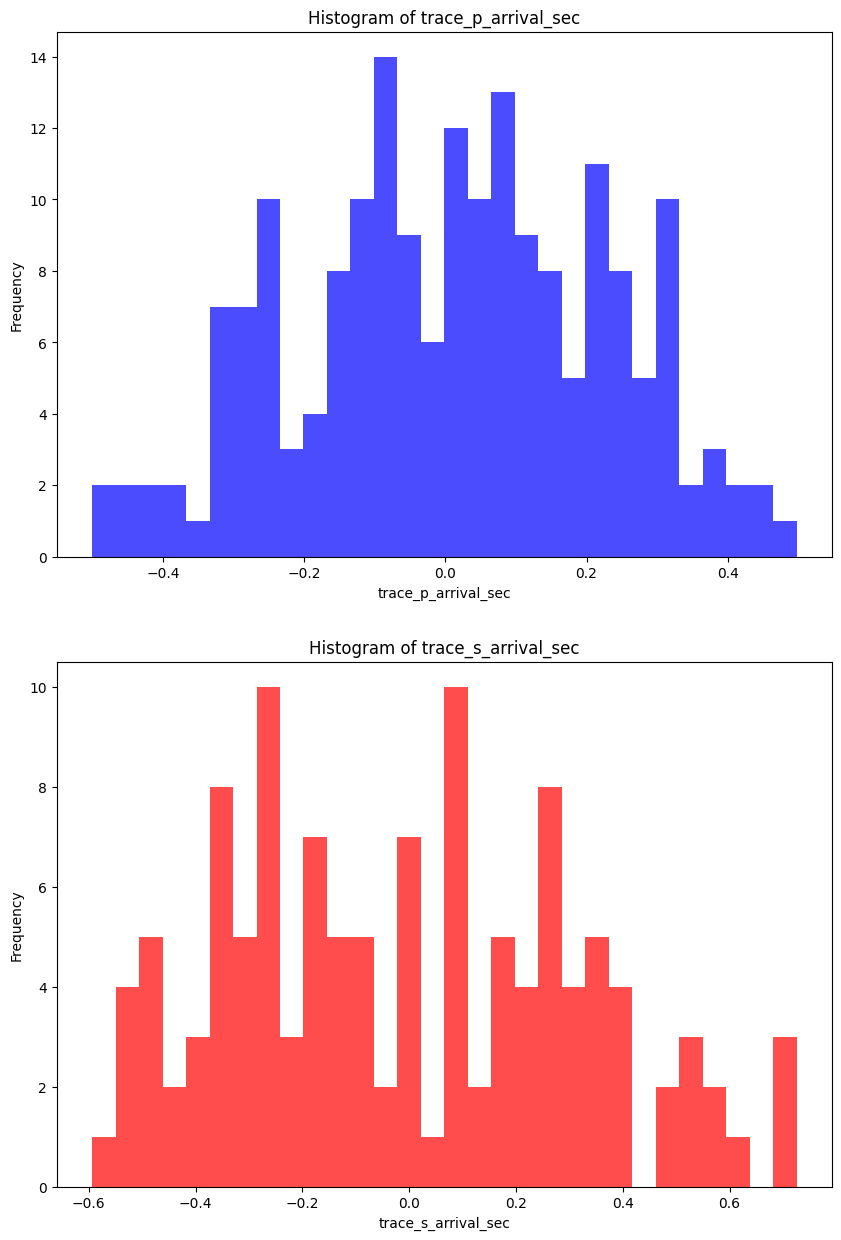

In [361]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Histogram for trace_p_arrival_sec
axes[0].hist(pd.to_numeric(p_dataset['trace_p_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of trace_p_arrival_sec')
axes[0].set_xlabel('trace_p_arrival_sec')
axes[0].set_ylabel('Frequency')

# Histogram for trace_s_arrival_sec
axes[1].hist(pd.to_numeric(s_dataset['trace_s_arrival_sec_detrended'], errors='coerce').dropna(), bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of trace_s_arrival_sec')
axes[1].set_xlabel('trace_s_arrival_sec')
axes[1].set_ylabel('Frequency')

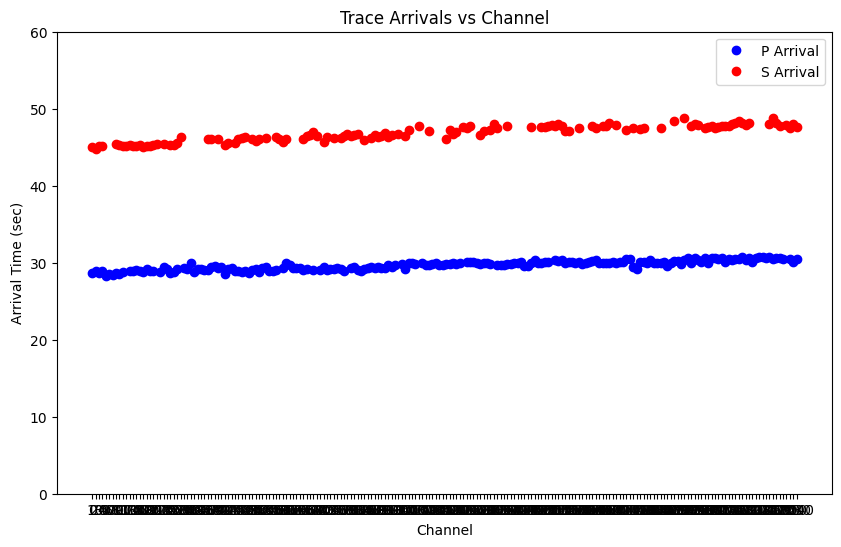

In [362]:
#original
plt.figure(figsize=(10, 6))


plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(dropped_dataset['das_number'], dropped_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

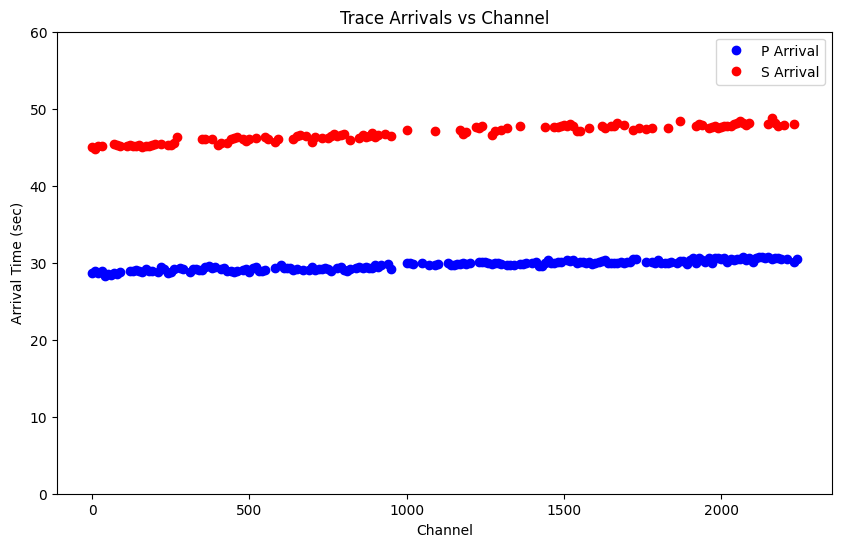

In [363]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [364]:
#interpolate the missing values from the p_outliers and s_outliers dataframes using the interpolate function
p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()

s_dataset


C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\3394753993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_dataset['trace_p_arrival_sec_interpolated'] = p_dataset['trace_p_arrival_sec'].interpolate()
C:\Users\alexa\AppData\Local\Temp\ipykernel_32052\3394753993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_dataset['trace_s_arrival_sec_interpolated'] = s_dataset['trace_s_arrival_sec'].interpolate()


,trace_s_arrival_sec,das_number,trace_s_arrival_sec_detrended,trace_s_arrival_sec_interpolated
1,44.980000,0.0,-0.311748,44.980000
96,44.810001,10.0,-0.495546,44.810001
191,45.189999,20.0,-0.129347,45.189999
286,45.180000,30.0,-0.153145,45.180000
666,45.459999,70.0,0.071656,45.459999
...,...,...,...,...
20711,47.779999,2180.0,-0.519982,47.779999
20901,47.860001,2200.0,-0.467579,47.860001
20996,NaN,2210.0,NaN,47.930000
21186,48.000000,2230.0,-0.368977,48.000000


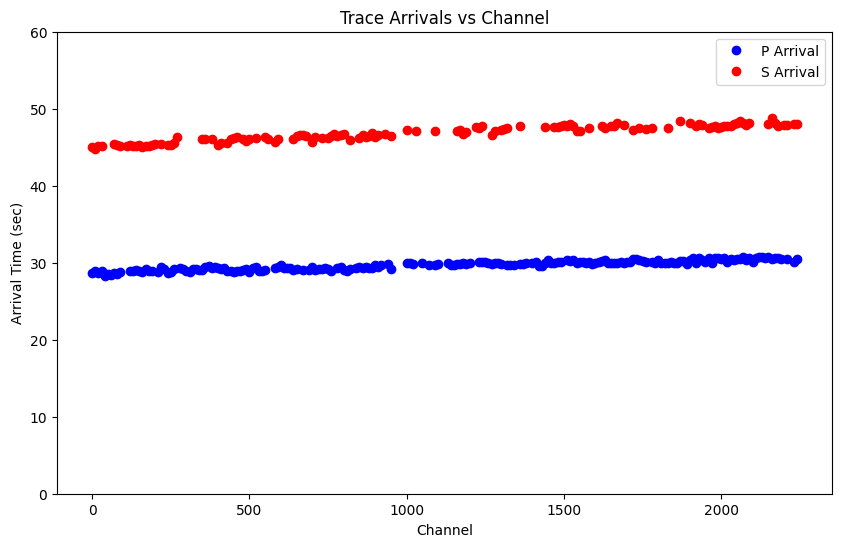

In [365]:
plt.figure(figsize=(10, 6))
  

plt.plot(p_dataset['das_number'], p_dataset['trace_p_arrival_sec_interpolated'], 'o', color='blue', label='P Arrival')
plt.plot(s_dataset['das_number'], s_dataset['trace_s_arrival_sec_interpolated'], 'o', color='red', label='S Arrival')

plt.title(f'Trace Arrivals vs Channel')
plt.xlabel('Channel')
plt.ylabel('Arrival Time (sec)')
plt.ylim(0, 60)
plt.legend()

In [366]:
from numpy import arange

new_array = arange(1, 2251, 1)
new_array


array([   1,    2,    3, ..., 2248, 2249, 2250], shape=(2250,))

In [ ]:
#add the values from the trace_arrival_sec_interpolated columns to the new_array and the trace_arrival_sec




